In [80]:
import pandas as pd
import numpy as np
from ast import literal_eval
import json
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import warnings
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

# Reading Data

In [81]:
df = pd.read_csv("/Users/visheshchugh/Desktop/artefacttechnicalassessment/dataset.csv_(DS_A-L2).csv")
mapping = pd.read_json("/Users/visheshchugh/Desktop/artefacttechnicalassessment/mappings.json_(DS_A-L2).json")

In [82]:
print(df.shape)
df.head(5)

(10000, 7)


,id,content,date,language,tags,title,ratings
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment'...",Green Mountain Resort,"{'normalized': 100, 'raw': 5}"
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment'...",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}"
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",Dammam Corniche,"{'normalized': 100, 'raw': 5}"


In [83]:
print(mapping.shape)
mapping.head(5)

(113, 1)


,tags_mapping
c07bbh0cu1iccnqmcq00,"[Accommodation, Abha]"
c07bbj4bb64t6si78rh0,"[Food & Beverage, Abha]"
c07bbvvepd3oq1r122o0,"[Retail, Abha]"
c07bdfc8hb0r13sa7afg,"[Accommodation, Al Ahsa]"
c07bdfc8hb0r13sa7ag0,"[Food & Beverage, Al Ahsa]"


# Dropping duplicates in the dataset (11 reviews)

In [84]:
df[df.duplicated()]

,id,content,date,language,tags,title,ratings
824,377380-203583752857,ممتاز,2021-04-11T07:05:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
825,377380-203582792636,تحتاج خلاط وتطلع ممتازه,2021-04-11T07:05:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7ag0', 'sentiment'...",Uqair Beach,"{'normalized': 100, 'raw': 5}"
1696,377380-203584587118,ناقصه بعض الاهتمام والخدمات,2021-04-11T07:24:00+00:00,ara,"[{'value': 'c9g9th4bb64rs4ni6s70', 'sentiment'...",Umluj Beach,"{'normalized': 60, 'raw': 3}"
6440,377380-167674318288,جميل,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123qg', 'sentiment'...",The Seven Mosques,"{'normalized': 100, 'raw': 5}"
6442,377380-167303028855,اجيك يسلم راسك وشلون ما جيك .. الذ والذ استلذا...,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment'...",Ibrahim Al Zahrani Grills,"{'normalized': 100, 'raw': 5}"
6443,377380-167517004446,متنوع,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s3g', 'sentiment'...",Al Mahmal Center,"{'normalized': 100, 'raw': 5}"
6445,377380-167514637736,جميل ومنظم,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c07bbvvepd3oq1r122o0', 'sentiment'...",Aseer Mall,"{'normalized': 100, 'raw': 5}"
7368,377380-167972760325,More(Translated by Google) Best Arabic coffee ...,2021-02-11T00:00:00+00:00,eng,"[{'value': 'c07bdkkbb64t6si78s2g', 'sentiment'...",Haif & Kaif Cafe,"{'normalized': 80, 'raw': 4}"
7375,377380-169776419512,جميل,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c07bjr48hb0r13sa7c8g', 'sentiment'...",Al Tawba Mosque,"{'normalized': 100, 'raw': 5}"
7377,377380-167750997640,More(Translated by Google) One of the largest ...,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment'...",Hayat Mall,"{'normalized': 100, 'raw': 5}"


In [85]:
df.id.nunique()

9989

In [86]:
df = df.drop_duplicates()
df.shape

(9989, 7)

# Dropping 10 reviews with NULL rating

In [87]:
df.isnull().sum()

id           0
content      0
date         0
language     0
tags         0
title        0
ratings     10
dtype: int64

In [88]:
df.loc[df.ratings.isnull()]

,id,content,date,language,tags,title,ratings
1213,377380-203592313113,"( Google) , , ( )",2021-04-11T07:14:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1245,377380-203592306100,"( Google) , , ( )",2021-04-11T07:15:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1288,377380-203592306933,( Google) - ( ),2021-04-11T07:16:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1456,377380-203592309887,"( Google) - , , , , , ( )",2021-04-11T07:19:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1481,377380-203592315650,( Google) ( ) Good place,2021-04-11T07:20:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1799,377380-203588492010,"( Google) !! Abit , ( ) Awesome!! Abit cold, b...",2021-04-11T07:27:00+00:00,eng,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN
1934,377380-203588498652,"( Google) , . ( )",2021-04-11T07:31:00+00:00,eng,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN
2816,377380-203592291403,(Переведено Google) Зоопарк сладок еще раз еще...,2021-04-11T07:52:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
3189,377380-203592281835,"(Переведено Google) Парк очень красивый, не хв...",2021-04-11T08:01:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s30', 'sentiment'...",Riyadh Zoo,NaN
3602,377380-203588466840,(Переведено Google) Лес Рагдан - красивый боль...,2021-04-11T08:11:00+00:00,ara,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN


In [89]:
df_nonnull = df.loc[~df.ratings.isnull()].copy()

# Extracting Offering, Destination Tags & Raw, Normalized Ratings

In [90]:
#tags : list of dictionaries
df_nonnull['tags'][0]

"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]"

In [91]:
temp = df_nonnull['tags'].apply(literal_eval).apply(pd.Series)
temp = temp.applymap(lambda x: {} if pd.isnull(x) else x)

In [93]:
def extract_values(dictionary):
    if dictionary:
        val = dictionary['value']  
        return val
    
def extract_rating(dictionary,type='raw'):
    if dictionary:
        val = dictionary[type]  
        return val
    
df_nonnull['ratings_raw'] = df_nonnull['ratings'].apply(literal_eval).apply(lambda x: pd.Series(extract_rating(x)))
df_nonnull['ratings_norm'] = df_nonnull['ratings'].apply(literal_eval).apply(lambda x: pd.Series(extract_rating(x,'normalized')))

fin = pd.DataFrame()
for cols in temp.columns:
    inter = temp[cols].apply(lambda x: pd.Series(extract_values(x)))
    fin = pd.concat([fin,inter],axis=1)
fin.columns = ['tag_' + str(x) for x in range(1,6)]    

In [94]:
fin

,tag_1,tag_2,tag_3,tag_4,tag_5
0,c07bdfc8hb0r13sa7agg,c07bdfc8hb0r13sa7ah0,NaN,NaN,NaN
1,c07bdncbb64t6si78ssg,c07bdofepd3oq1r123kg,c0rquskbb64sdb6ukkq0,c0rqv8sbb64sdb6ukks0,c07bdifepd3oq1r122rg
2,c0rlhqgcu1i938rekca0,NaN,NaN,NaN,NaN
3,c9ga0skbb64rs4ni6s7g,NaN,NaN,NaN,NaN
4,c07bdncbb64t6si78ssg,c07bdifepd3oq1r122rg,NaN,NaN,NaN
...,...,...,...,...,...
9995,c07bdfc8hb0r13sa7agg,c07bdfc8hb0r13sa7amg,NaN,NaN,NaN
9996,c07bdifepd3oq1r122r0,NaN,NaN,NaN,NaN
9997,c07bk44bb64t6si78v80,NaN,NaN,NaN,NaN
9998,c0rqvf8cu1i938rekgn0,NaN,NaN,NaN,NaN


In [95]:
inter = pd.DataFrame()
for col in fin.columns[::-1]:
    print(col)
    fin[col] = fin[col].map(mapping['tags_mapping'])
    temp = fin[col].apply(pd.Series)
    temp.columns = ['Offering_'+col,'Destination_'+col]
    inter = pd.concat([temp,inter],axis=1)

tag_5
tag_4
tag_3
tag_2
tag_1


In [96]:
inter.head(5)

,Offering_tag_1,Destination_tag_1,Offering_tag_2,Destination_tag_2,Offering_tag_3,Destination_tag_3,Offering_tag_4,Destination_tag_4,Offering_tag_5,Destination_tag_5
0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN
1,Tourism Attractions/ Sites,Khobar,Tourism Attractions/ Sites,Madinah,Accommodation,Riyadh,Tourism Attractions/ Sites,Riyadh,Tourism Attractions/ Sites,Dammam
2,Tourism Attractions/ Sites,Taif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tourism Attractions/ Sites,Yanbu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tourism Attractions/ Sites,Khobar,Tourism Attractions/ Sites,Dammam,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
final_df = pd.concat([df_nonnull[['id','content','date','language','title','ratings_raw','ratings_norm']],inter],axis=1)

In [98]:
final_df.id.nunique()

9979

# EDA

In [99]:
final_df.head(5)

,id,content,date,language,title,ratings_raw,ratings_norm,Offering_tag_1,Destination_tag_1,Offering_tag_2,Destination_tag_2,Offering_tag_3,Destination_tag_3,Offering_tag_4,Destination_tag_4,Offering_tag_5,Destination_tag_5
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11T06:45:00+00:00,ara,Al Ahsa Mall by Arabian Centres,5.0,100,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11T06:45:00+00:00,ara,"King Abdullah Park, Sea front",5.0,100,Tourism Attractions/ Sites,Khobar,Tourism Attractions/ Sites,Madinah,Accommodation,Riyadh,Tourism Attractions/ Sites,Riyadh,Tourism Attractions/ Sites,Dammam
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,Green Mountain Resort,5.0,100,Tourism Attractions/ Sites,Taif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,Waterfront Beach Royal Commission Yanbu,4.0,80,Tourism Attractions/ Sites,Yanbu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,Dammam Corniche,5.0,100,Tourism Attractions/ Sites,Khobar,Tourism Attractions/ Sites,Dammam,NaN,NaN,NaN,NaN,NaN,NaN


## Fill-rate in tags

In [100]:
cols = [col for col in final_df.columns if 'tag' in col]
100 - (final_df[cols].isnull().sum()/final_df.shape[0]*100)

Offering_tag_1       100.000000
Destination_tag_1    100.000000
Offering_tag_2        23.068444
Destination_tag_2     23.068444
Offering_tag_3         4.830143
Destination_tag_3      4.830143
Offering_tag_4         1.433009
Destination_tag_4      1.433009
Offering_tag_5         0.611284
Destination_tag_5      0.611284
dtype: float64

## Date range of reviews

In [101]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [102]:
final_df['date'].min(),final_df['date'].max()

(Timestamp('2021-02-07 00:00:00+0000', tz='UTC'),
 Timestamp('2023-10-03 06:31:00+0000', tz='UTC'))

## Review language distribution

In [103]:
final_df['language'].value_counts(1)*100

ara    76.129873
eng    23.870127
Name: language, dtype: float64

## Ratings Distribution

In [104]:
final_df.ratings_raw.min(),final_df.ratings_norm.min()

(0.5, 10)

In [105]:
final_df.ratings_raw.max(),final_df.ratings_norm.max()

(10.0, 100)

In [106]:
final_df.ratings_raw.value_counts(1)*100

5.0     60.366770
4.0     17.376491
3.0     10.912917
1.0      7.335404
2.0      3.687744
4.5      0.070147
8.0      0.070147
10.0     0.060126
3.5      0.050105
6.0      0.040084
2.5      0.020042
0.5      0.010021
Name: ratings_raw, dtype: float64

In [107]:
final_df.ratings_norm.value_counts(1)*100

100    60.426896
80     17.426596
60     10.953001
20      7.345425
40      3.697765
90      0.070147
70      0.050105
50      0.020042
10      0.010021
Name: ratings_norm, dtype: float64

In [108]:
# All ratings < 5 in raw are normalized as per /5 * 100
# All ratings > 5 in raw are multiplied by 10 in normalized

## Review title distribution

In [109]:
final_df['title'].value_counts(1)*100

Masjid al-Haram                                          4.429302
Skill On The Grill : Urban Steakhouse                    1.873935
Al Soudah National Park                                  1.863914
Umluj Beach                                              1.503157
The Saudi National Museum - The Saudi National Museum    1.382904
                                                           ...   
Tanjiah Restaurant                                       0.010021
Meral Hotel Mecca                                        0.010021
Meez restaurant                                          0.010021
Mekado House                                             0.010021
Güzel Saray                                              0.010021
Name: title, Length: 1058, dtype: float64

## Tag distribution

### Offerings distribution

In [110]:
final_df['Offering_tag_1'].value_counts(1,dropna=False)*100

Tourism Attractions/ Sites    45.144804
Accommodation                 27.557872
Food & Beverage               12.315863
Retail                         7.626015
Religious                      7.355446
Name: Offering_tag_1, dtype: float64

In [111]:
final_df['Offering_tag_2'].value_counts(1,dropna=False)*100

NaN                           76.931556
Tourism Attractions/ Sites    10.201423
Accommodation                  5.421385
Retail                         4.128670
Food & Beverage                2.695661
Religious                      0.621305
Name: Offering_tag_2, dtype: float64

In [112]:
columns_to_check = ['Offering_tag_1','Offering_tag_2','Offering_tag_3','Offering_tag_4','Offering_tag_5']

In [113]:
temp1 = pd.melt(final_df[['id']+columns_to_check],id_vars='id')
temp1

,id,variable,value
0,377380-203583770957,Offering_tag_1,Tourism Attractions/ Sites
1,377380-203585579625,Offering_tag_1,Tourism Attractions/ Sites
2,377380-203590496913,Offering_tag_1,Tourism Attractions/ Sites
3,377380-203589330972,Offering_tag_1,Tourism Attractions/ Sites
4,377380-203586632060,Offering_tag_1,Tourism Attractions/ Sites
...,...,...,...
49890,377380-170059072985,Offering_tag_5,NaN
49891,377380-168116614508,Offering_tag_5,NaN
49892,377380-170027061275,Offering_tag_5,NaN
49893,377380-167887315495,Offering_tag_5,NaN


In [114]:
temp1.columns = ['id','Offering','Offering_value']

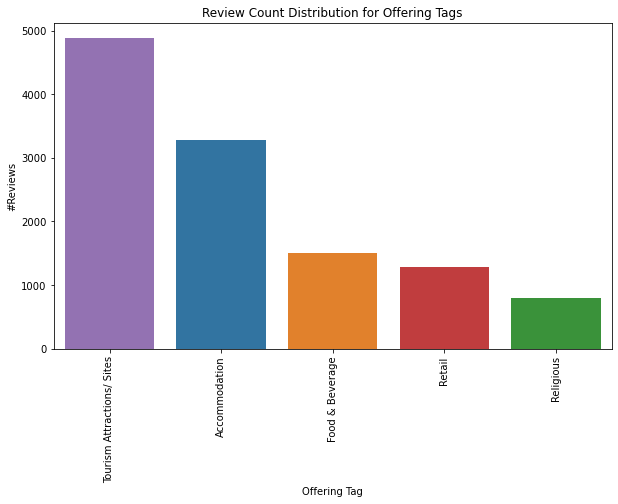

In [115]:
plotting_offering1 = temp1.groupby('Offering_value').id.nunique().reset_index()
plotting_offering1.columns = ['Offering Tag','#Reviews']

plotting_offering1 = plotting_offering1.sort_values('#Reviews',ascending=False)
colors = sns.color_palette(['#9467bd','#1f77b4','#ff7f0e','#d62728','#2ca02c'])
plt.figure(figsize=(10,6))
sns.barplot(x="Offering Tag", 
           y="#Reviews", 
           data=plotting_offering1,palette=colors) 
plt.xticks(rotation=90) 
plt.title("Review Count Distribution for Offering Tags") 
plt.show()

### Destination Distribution

In [116]:
final_df['Destination_tag_1'].value_counts(1,dropna=False)*100

Madinah            18.478805
Makkah             12.796873
Jeddah             12.496242
Riyadh             12.075358
Khobar              7.325383
Taif                7.315362
Abha                4.258944
Al Ahsa             4.098607
Tabuk               3.296924
Dammam              3.036376
Yanbu               2.805892
Al Baha             2.415072
Jizan               2.174567
Tanomah             1.934062
Umluj               1.503157
Al Namas            1.342820
KAEC                0.941978
Sakaka / AlJouf     0.891873
Hail                0.470989
Qassim              0.190400
Al Ula              0.100210
Al Diriyah          0.050105
Name: Destination_tag_1, dtype: float64

In [117]:
final_df['Destination_tag_2'].value_counts(1,dropna=False)*100

NaN                76.931556
Riyadh             10.431907
Dammam              3.276881
Madinah             2.395030
Al Ahsa             2.074356
Jeddah              1.473093
Makkah              0.941978
Taif                0.921936
Tanomah             0.641347
Khobar              0.531115
Abha                0.140295
Tabuk               0.100210
Jizan               0.030063
Sakaka / AlJouf     0.030063
Hail                0.020042
Yanbu               0.020042
Al Diriyah          0.020042
Al Baha             0.010021
Umluj               0.010021
Name: Destination_tag_2, dtype: float64

In [118]:
columns_to_check = ['Destination_tag_1','Destination_tag_2','Destination_tag_3','Destination_tag_4','Destination_tag_5']

In [119]:
temp2 = pd.melt(final_df[['id']+columns_to_check],id_vars='id')
temp2.columns = ['id','Destination','Destination_value']

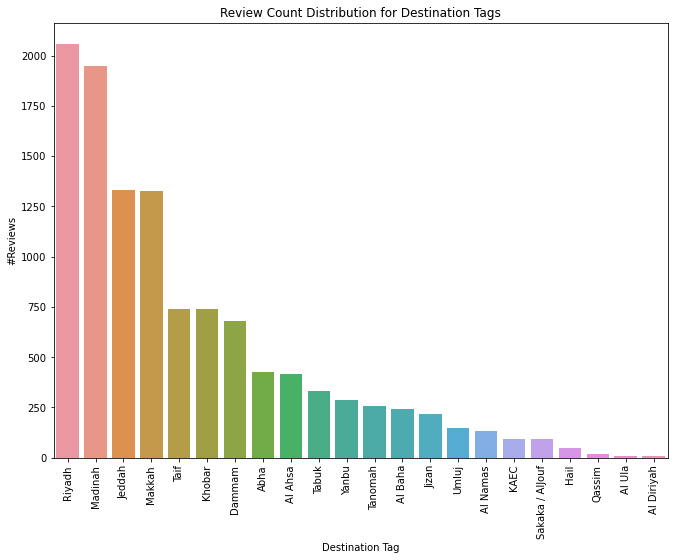

In [120]:
plotting_dest1 = temp2.groupby('Destination_value').id.nunique().reset_index()
plotting_dest1.columns = ['Destination Tag','#Reviews']

plotting_dest1 = plotting_dest1.sort_values('#Reviews',ascending=False)
plt.figure(figsize=(11,8))
sns.barplot(x="Destination Tag", 
           y="#Reviews", 
           data=plotting_dest1) 
plt.xticks(rotation=90) 
plt.title("Review Count Distribution for Destination Tags") 
plt.show()

## Offerings Distribution with Destinations

In [121]:
merged = temp1.merge(temp2,on='id',how='inner')

In [122]:
merged['Offering_tag'] = merged.Offering.str.split('_').str[-1]
merged['Destination_tag'] = merged.Destination.str.split('_').str[-1]
check = merged[merged.Offering_tag == merged.Destination_tag]

In [123]:
check = check.dropna()

In [124]:
plotting = check.groupby(['Destination_value', 'Offering_value']).id.nunique().reset_index(name='count')

In [125]:
plotting = plotting.sort_values('count',ascending=False)

In [126]:
dfp = plotting.pivot(index='Destination_value', columns='Offering_value', values='count')
plotting_dest1.set_index('Destination Tag', inplace=True)
dfp = dfp.reindex(plotting_dest1.index)
tot = dfp.sum(axis=1)

per = dfp.div(tot, axis=0).mul(100).round(2)

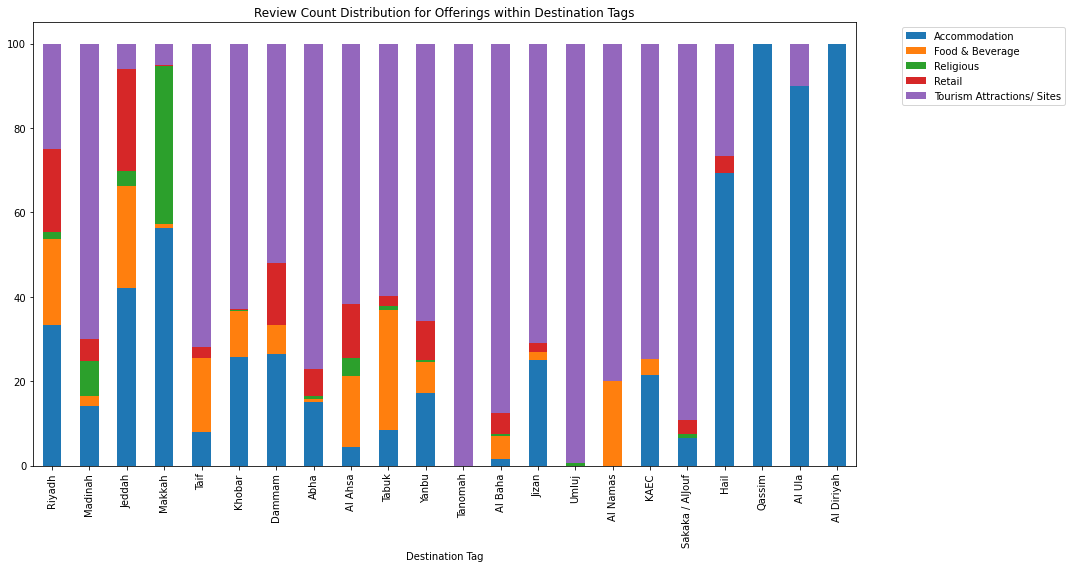

In [127]:
per.plot(kind='bar', 
                    stacked=True, 
                    figsize=(15, 8))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Review Count Distribution for Offerings within Destination Tags") 
plt.tight_layout()
plt.show()

## Rating distribution for Offerings

In [128]:
print("Avg rating in the entire dataset:",final_df.ratings_norm.mean())

Avg rating in the entire dataset: 83.99739452850987


In [129]:
columns_to_check = ['Offering_tag_1','Offering_tag_2','Offering_tag_3','Offering_tag_4','Offering_tag_5']
offerings_melt = pd.melt(final_df[['id']+columns_to_check + ['ratings_norm']],id_vars=['id','ratings_norm'])

In [130]:
plotting_offering2 = offerings_melt.groupby("value").ratings_norm.mean().reset_index()

In [131]:
plotting_offering1.set_index('Offering Tag', inplace=True)
plotting_offering2.set_index('value', inplace=True)

In [132]:
plotting_offering2 = plotting_offering2.reindex(plotting_offering1.index)

In [133]:
plotting_offering2 = plotting_offering2.reset_index()

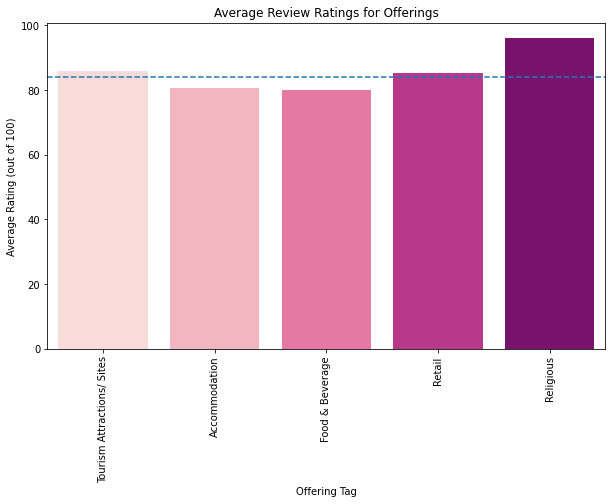

In [134]:
plotting_offering2.columns = ['Offering Tag','Average Rating (out of 100)']

ok = sns.color_palette("RdPu", 5)
plt.figure(figsize=(10,6))
sns.barplot(x="Offering Tag", 
           y="Average Rating (out of 100)", 
           data=plotting_offering2,palette = ok) 
plt.axhline(y=final_df.ratings_norm.mean(),linestyle = '--')
plt.xticks(rotation=90) 
plt.title("Average Review Ratings for Offerings") 

plt.show()

## Rating distribution for Destination

In [135]:
columns_to_check = ['Destination_tag_1','Destination_tag_2','Destination_tag_3','Destination_tag_4','Destination_tag_5']
dest_melt = pd.melt(final_df[['id']+columns_to_check + ['ratings_norm']],id_vars=['id','ratings_norm'])

plotting3 = dest_melt.groupby("value").ratings_norm.mean().reset_index()

In [136]:
plotting3.set_index('value', inplace=True)
plotting3 = plotting3.reindex(plotting_dest1.index)

In [137]:
plotting3.reset_index(inplace=True)

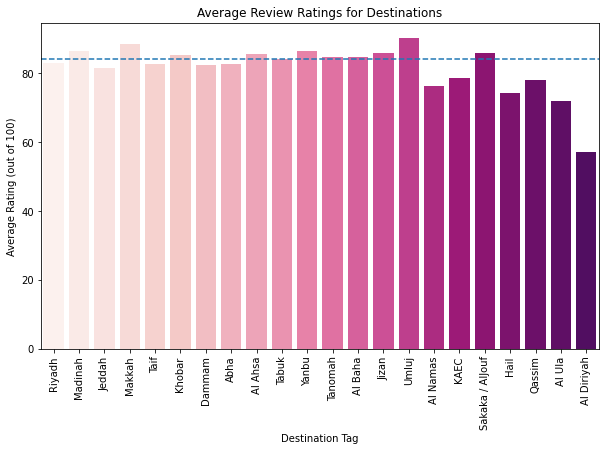

In [138]:
plotting3.columns = ['Destination Tag','Average Rating (out of 100)']
ok = sns.color_palette("RdPu", 22)
plt.figure(figsize=(10,6))
sns.barplot(x="Destination Tag", 
           y="Average Rating (out of 100)", 
           data=plotting3,palette = ok) 
plt.axhline(y=final_df.ratings_norm.mean(),linestyle = '--')
plt.title("Average Review Ratings for Destinations") 

plt.xticks(rotation=90) 
plt.show()

## Weekday & Ratings

In [141]:
final_df['Review_Day'] = pd.to_datetime(final_df['date']).dt.day_name()
final_df['Review_Day_no'] = pd.to_datetime(final_df['date']).dt.dayofweek

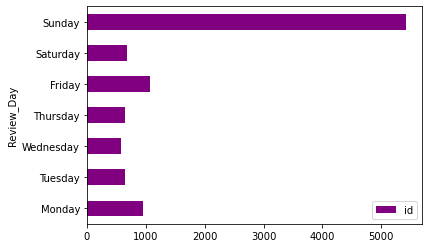

In [142]:
#No. of Reviews per day
a = final_df.groupby(['Review_Day_no','Review_Day']).id.nunique().reset_index()
a.plot.barh(x='Review_Day', y='id', color="purple")
plt.show()

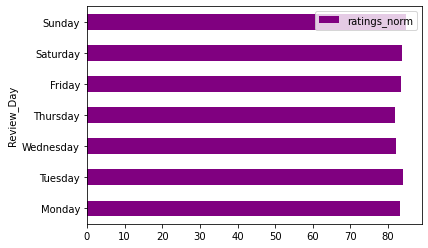

In [143]:
#Avg ratings per day
a = final_df.groupby(['Review_Day_no','Review_Day']).ratings_norm.mean().reset_index()
a.plot.barh(x='Review_Day', y='ratings_norm', color="purple")
plt.show()

# NLP : Sentiment Analysis

In [144]:
from deep_translator import GoogleTranslator

In [145]:
#Illustration
name = 'جميل❤'
name_translated = GoogleTranslator('ar', 'en').translate(name)
print(name_translated)

Beautiful❤


In [175]:
# df_nlp = final_df.copy()
def translate(sent):
    return GoogleTranslator('ar', 'en').translate(sent)

# df_nlp['content_en'] = np.vectorize(translate)(df_nlp['content'])
# df_nlp = pd.to_csv('intermediate_df.csv',index=False)
df_nlp = pd.read_csv('intermediate_df.csv')

In [176]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [177]:
sentiment_scores('A green space where you can breathe fresh air.')

'Positive'

In [178]:
sentiment_scores('food was not so great')

'Negative'

In [183]:
#Get VADER Sentiment for english translated reviews
df_nlp.content_en = df_nlp.content_en.fillna('Positive')
vader_sentiment = []
for sent in df_nlp['content_en']:
    vader_sentiment.append(sentiment_scores(sent))
df_nlp['vader_sentiment'] = vader_sentiment

In [184]:
#Average rating per sentiment predicted
df_nlp.groupby('vader_sentiment').ratings_norm.mean()

vader_sentiment
Negative    48.908342
Neutral     77.855888
Positive    89.214740
Name: ratings_norm, dtype: float64

## Predicted sentiment average ratings

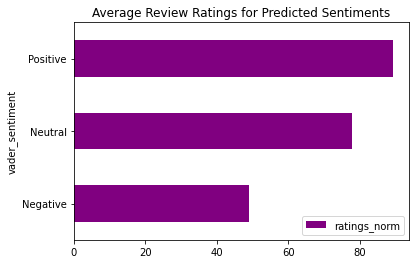

In [185]:
a = df_nlp.groupby('vader_sentiment').ratings_norm.mean().reset_index()
a.plot.barh(x='vader_sentiment', y='ratings_norm', color="purple")
plt.title("Average Review Ratings for Predicted Sentiments") 
plt.show()

In [186]:
df_nlp["rating_sentiment"] = np.where(df_nlp.ratings_norm>=80,"Positive",np.where(df_nlp.ratings_norm<=40,"Negative","Neutral"))

## Text Cleaning

In [191]:
import pandas as pd
import numpy as np
import syllables
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import tokenize,ngrams
from nltk.corpus import stopwords
import re
import textstat
import itertools
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [192]:
# Get part of speech(POS) for tokens
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [193]:
# Keeping only alphanumerics & remove URLs
def clean_text(a):
    a_replaced = re.sub('[^A-Za-z0-9]+', ' ', a)
    a_replaced = re.sub(r'w+:/{2}[dw-]+(.[dw-]+)*(?:(?:/[^s/]*))*', '', a_replaced)  
    return a_replaced

In [194]:
# Tokenize & Lemmatize
w_tokenizer = tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,get_wordnet_pos(dict(nltk.pos_tag([w]))[w])) 
            for w in w_tokenizer.tokenize(clean_text(text.lower())) 
            if w not in stopwords.words('english') + ["google","translated"]]

df_nlp['review_lemmas'] = df_nlp['content_en'].apply(lambda x : lemmatize_text(x))

In [200]:
#Illustration
lemmatize_text('I am running, so exciting, loving it. love')

['run', 'excite', 'love', 'love']

In [201]:
def lemmatize_text_wo_pos(text):
    return [lemmatizer.lemmatize(w,get_wordnet_pos(w)) 
            for w in w_tokenizer.tokenize(clean_text(text.lower())) 
            if w not in stopwords.words('english') + ["google","translated"]]

In [202]:
lemmatize_text_wo_pos('I am running, so exciting, loving it, love')

['running', 'exciting', 'loving', 'love']

## Overall Positive Sentiment Most Common Words

### Uni-grams

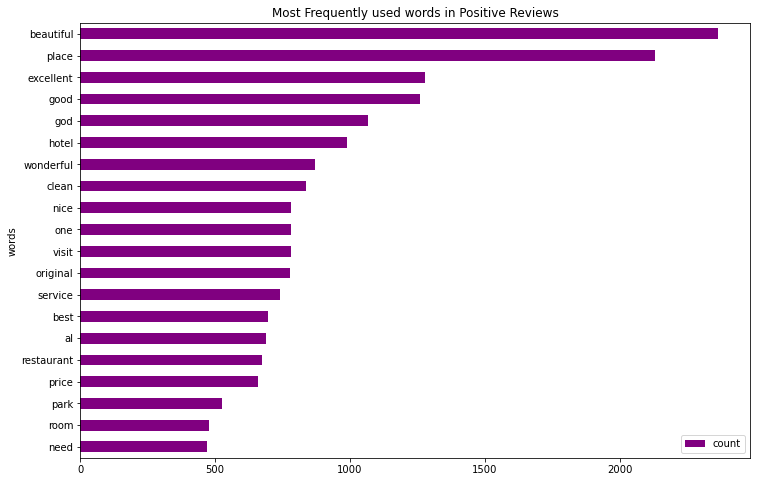

In [203]:
lemmatized_tokens = list(df_nlp[df_nlp['vader_sentiment']=='Positive']['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

### Bi-grams

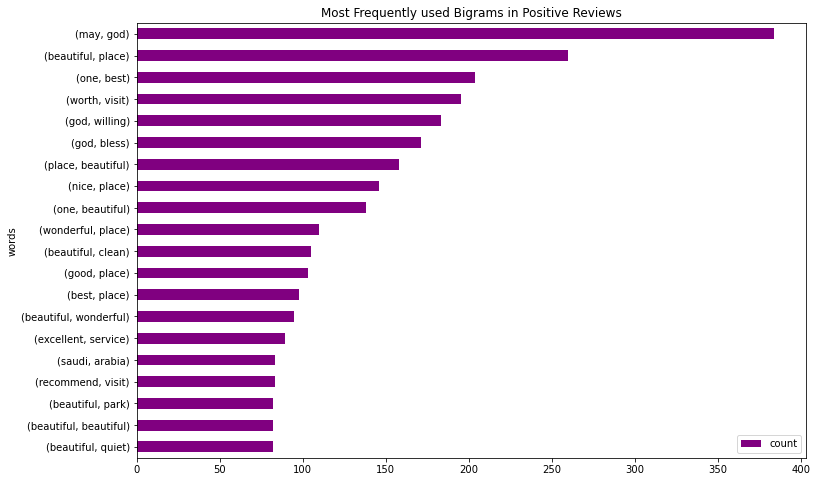

In [204]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

## Overall Negative Sentiment Most Common Words

### Uni-grams

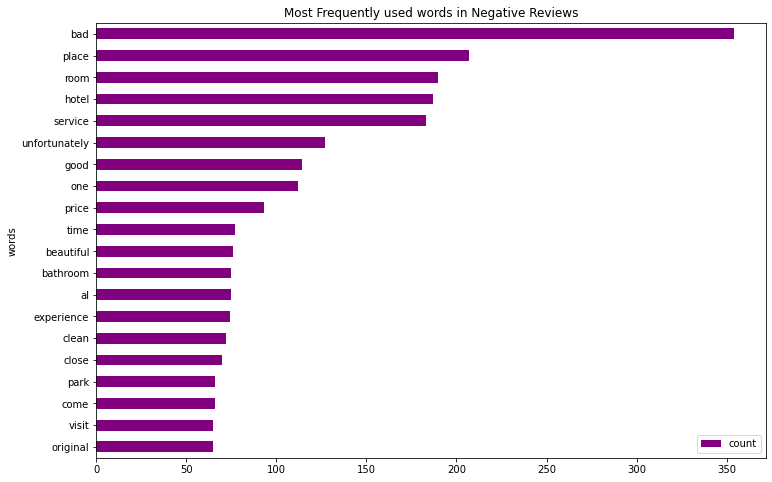

In [205]:
lemmatized_tokens = list(df_nlp[df_nlp['vader_sentiment']=='Negative']['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

### Bi-grams

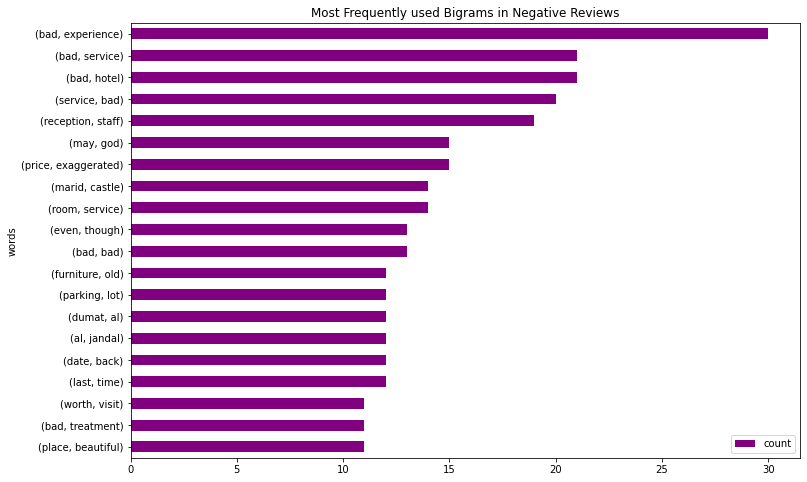

In [206]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()

## Common Words for Tags

### Accommodation Positive Sentiment Words

#### Uni-gram

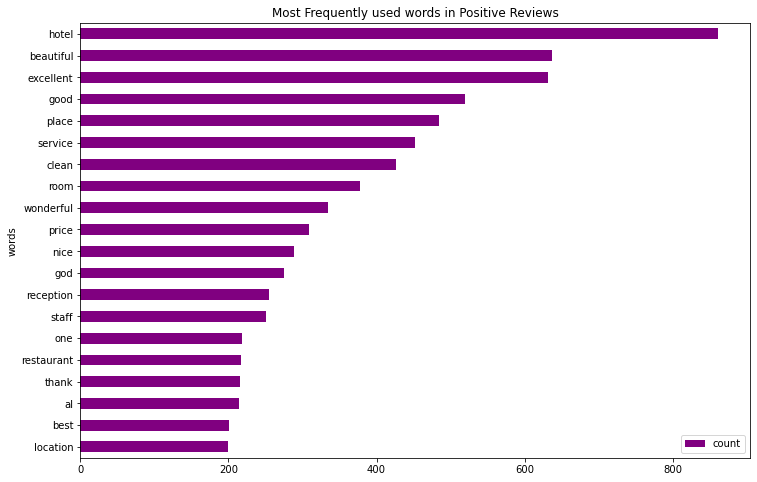

In [207]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Positive')
                                   & ((df_nlp['Offering_tag_1']=='Accommodation') | 
                                      (df_nlp['Offering_tag_2']=='Accommodation') | 
                                      (df_nlp['Offering_tag_3']=='Accommodation') | 
                                      (df_nlp['Offering_tag_4']=='Accommodation') | 
                                      (df_nlp['Offering_tag_5']=='Accommodation'))]['review_lemmas'])


token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

#### Bi-gram

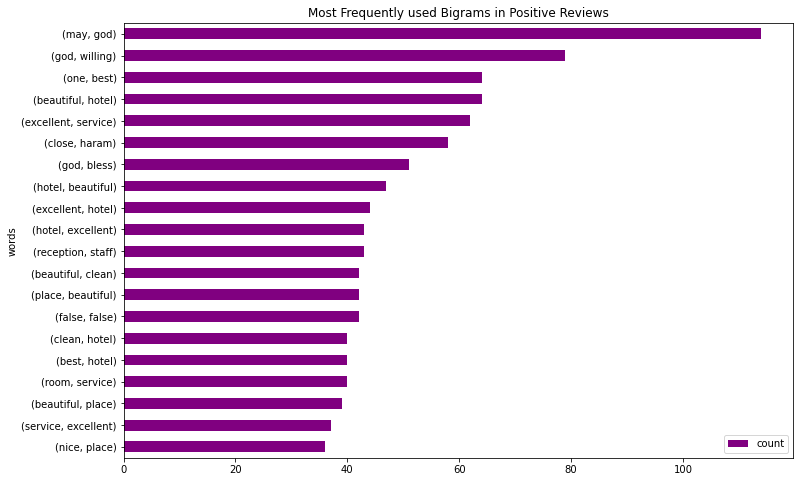

In [208]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

### Accommodation Negative Sentiment Words

#### Uni-gram

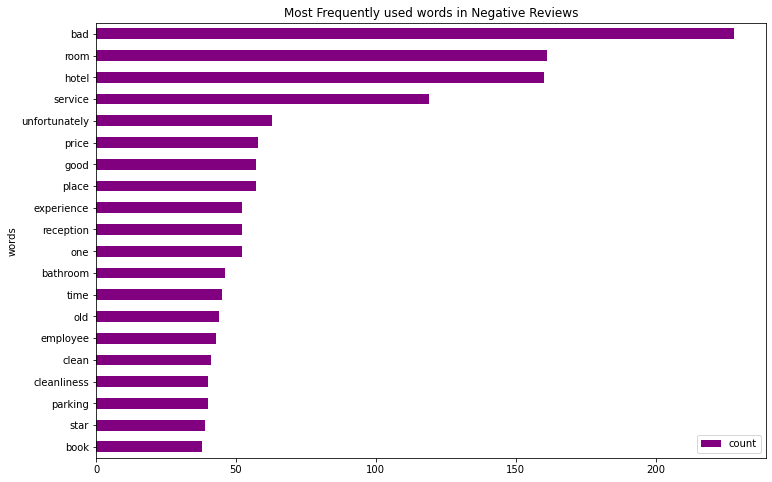

In [209]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Negative')
                                   & ((df_nlp['Offering_tag_1']=='Accommodation') | 
                                      (df_nlp['Offering_tag_2']=='Accommodation') | 
                                      (df_nlp['Offering_tag_3']=='Accommodation') | 
                                      (df_nlp['Offering_tag_4']=='Accommodation') | 
                                      (df_nlp['Offering_tag_5']=='Accommodation'))]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

#### Bi-gram

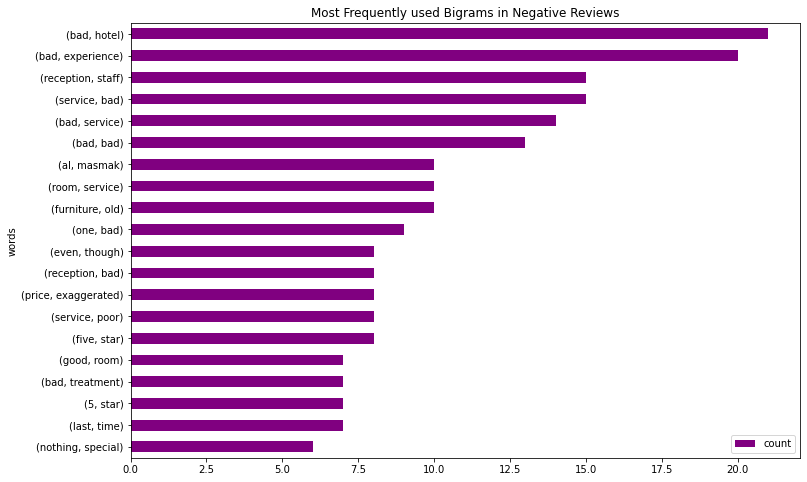

In [210]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()

### Tourism Positive Sentiment Words

#### Uni-gram

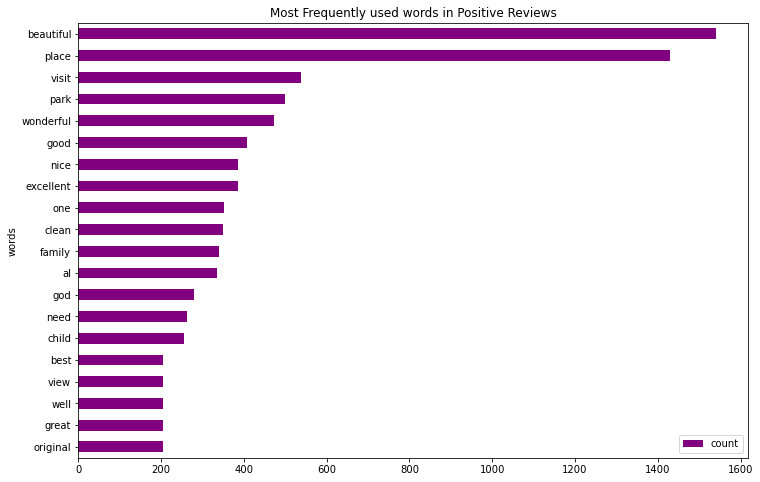

In [211]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Positive')
                                   & ((df_nlp['Offering_tag_1']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_2']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_3']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_4']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_5']=='Tourism Attractions/ Sites')
                                     )]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

#### Bi-gram

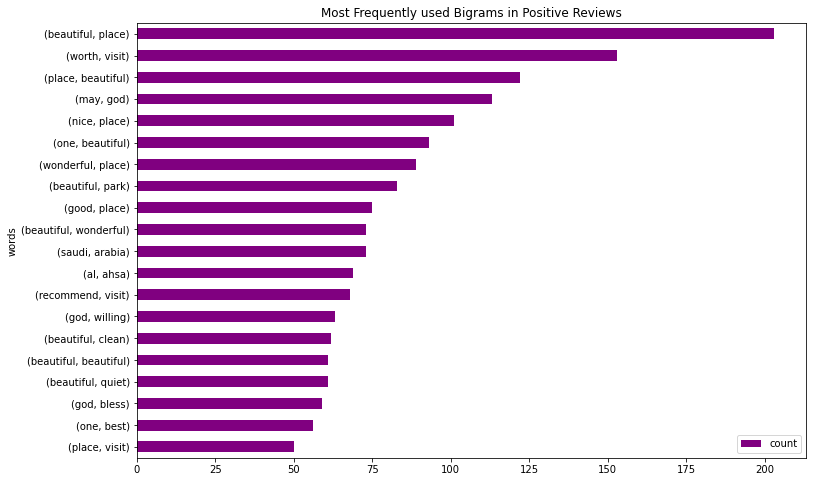

In [212]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

### Tourism Negative Sentiment Words

#### Uni-gram

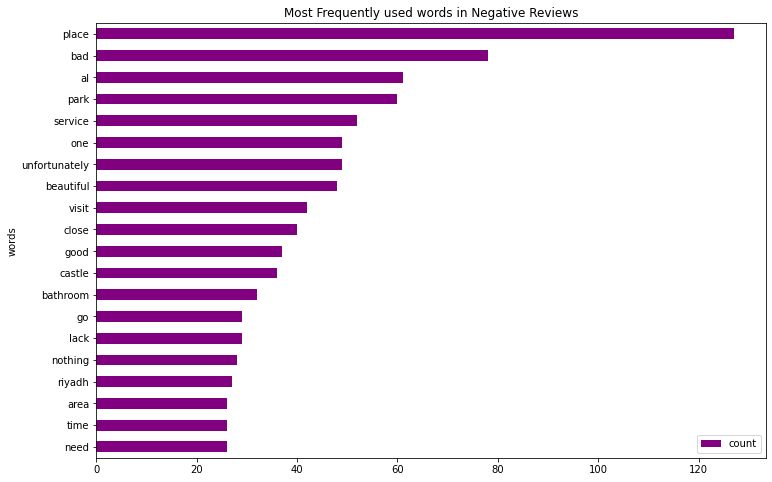

In [213]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Negative')
                                  & ((df_nlp['Offering_tag_1']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_2']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_3']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_4']=='Tourism Attractions/ Sites') | 
                                      (df_nlp['Offering_tag_5']=='Tourism Attractions/ Sites')
                                     )]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

#### Bi-gram

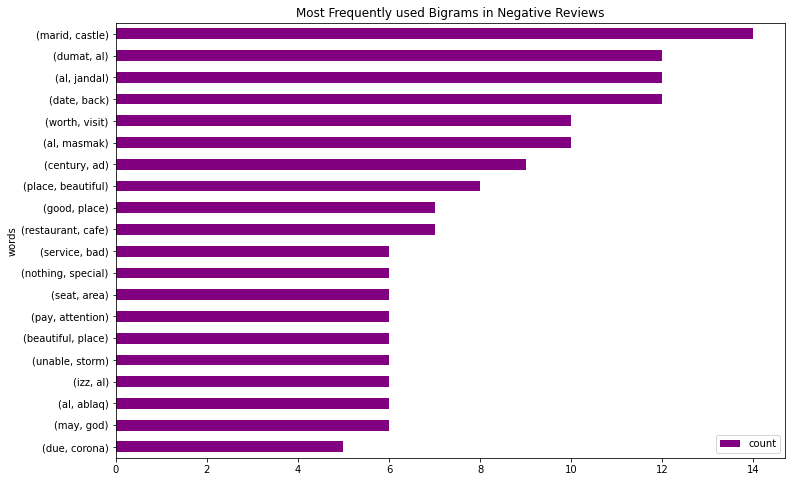

In [214]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()

### Food & Beverage Positive Sentiment Words

#### Uni-gram

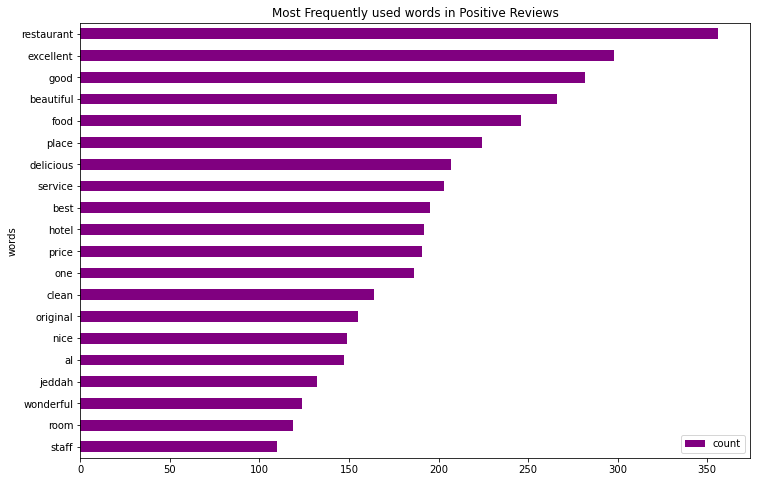

In [215]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Positive')
                                   & ((df_nlp['Offering_tag_1']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_2']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_3']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_4']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_5']=='Food & Beverage'))]['review_lemmas'])


token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

#### Bi-gram

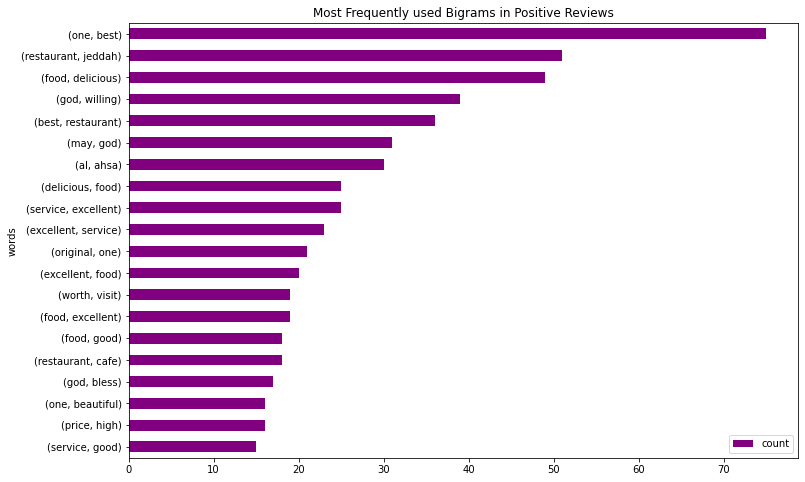

In [216]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

### Food & Beverage Negative Sentiment Words

#### Uni-gram

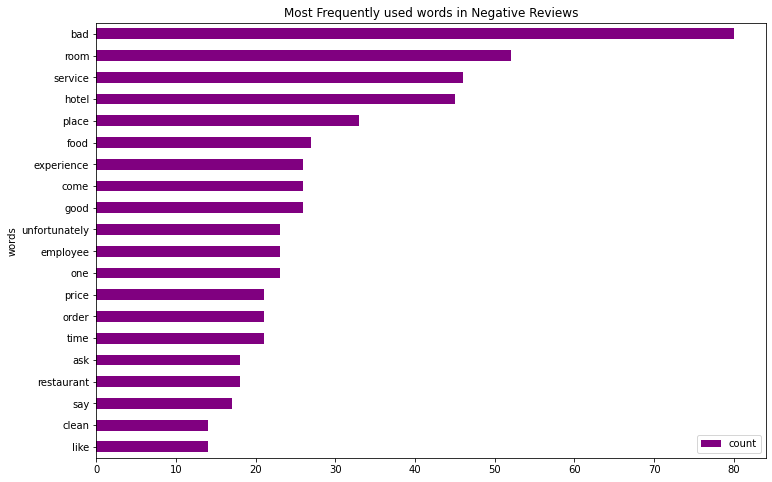

In [217]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Negative')
                                   & ((df_nlp['Offering_tag_1']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_2']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_3']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_4']=='Food & Beverage') | 
                                      (df_nlp['Offering_tag_5']=='Food & Beverage'))]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

#### Bi-gram

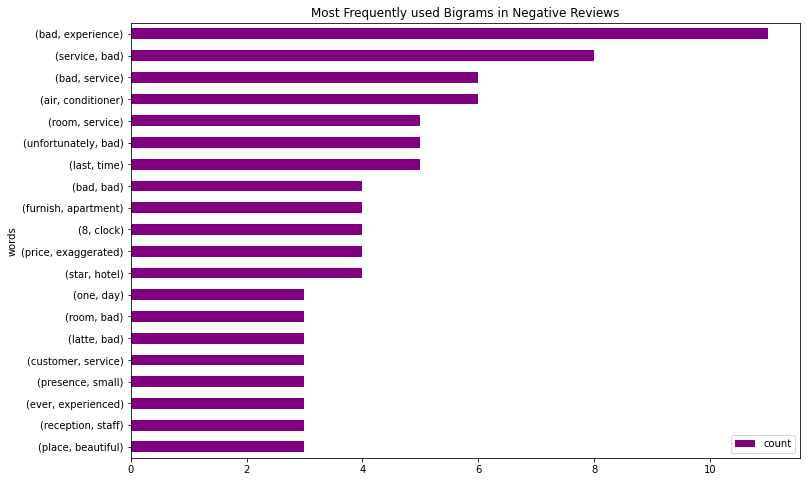

In [218]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()

### Retail Positive Sentiment Words

#### Uni-gram

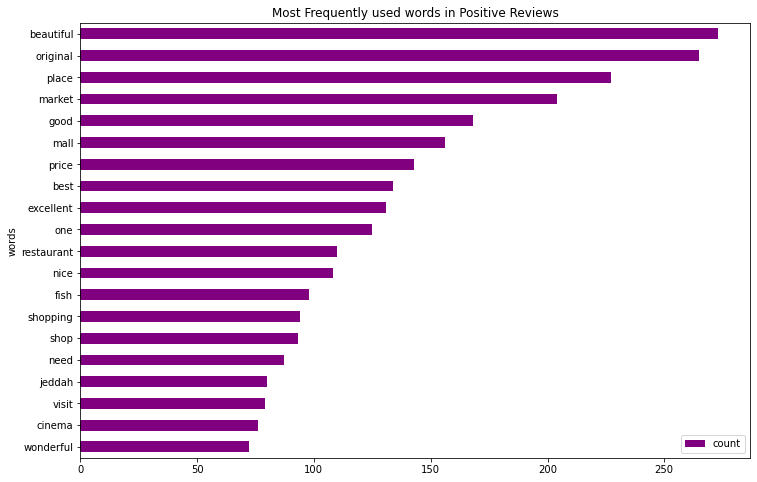

In [219]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Positive')
                                   & ((df_nlp['Offering_tag_1']=='Retail') | 
                                      (df_nlp['Offering_tag_2']=='Retail') | 
                                      (df_nlp['Offering_tag_3']=='Retail') | 
                                      (df_nlp['Offering_tag_4']=='Retail') | 
                                      (df_nlp['Offering_tag_5']=='Retail'))]['review_lemmas'])


token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

#### Bi-gram

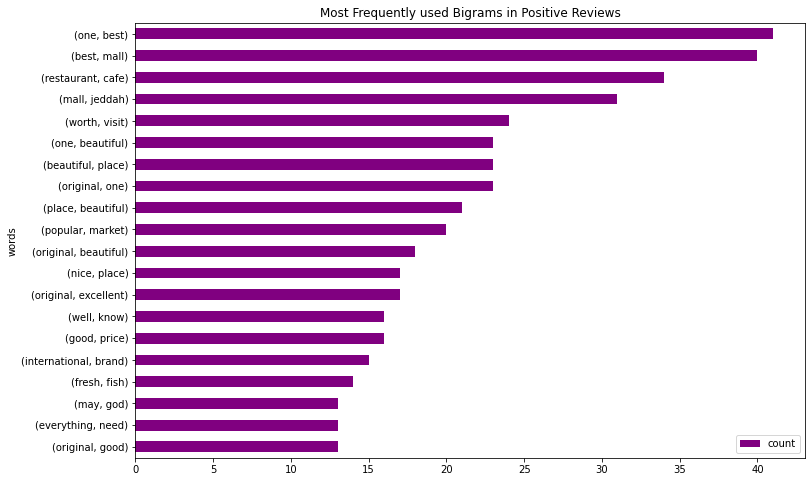

In [220]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

### Retail Negative Sentiment Words

#### Uni-gram

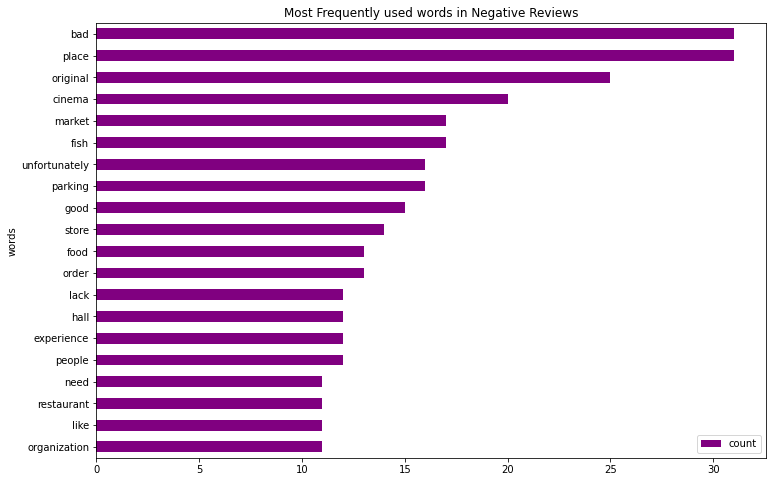

In [221]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Negative')
                                   & ((df_nlp['Offering_tag_1']=='Retail') | 
                                      (df_nlp['Offering_tag_2']=='Retail') | 
                                      (df_nlp['Offering_tag_3']=='Retail') | 
                                      (df_nlp['Offering_tag_4']=='Retail') | 
                                      (df_nlp['Offering_tag_5']=='Retail'))]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

#### Bi-gram

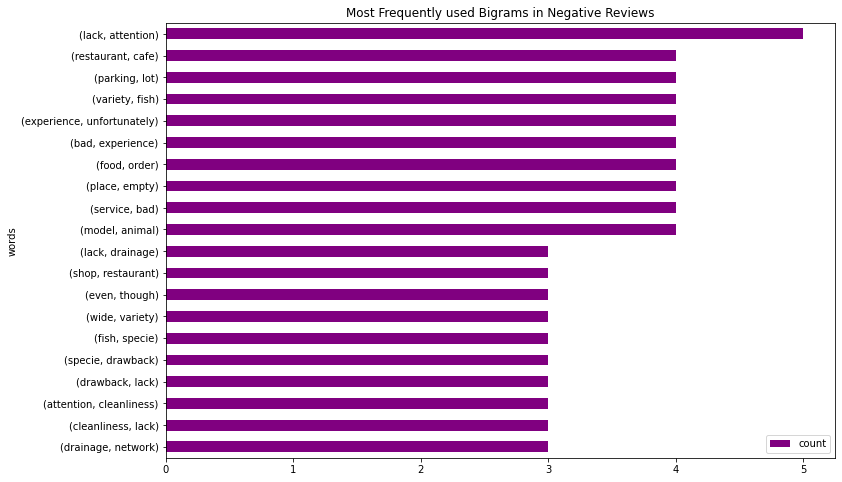

In [222]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()

### Religious Positive Sentiment Words

#### Uni-gram

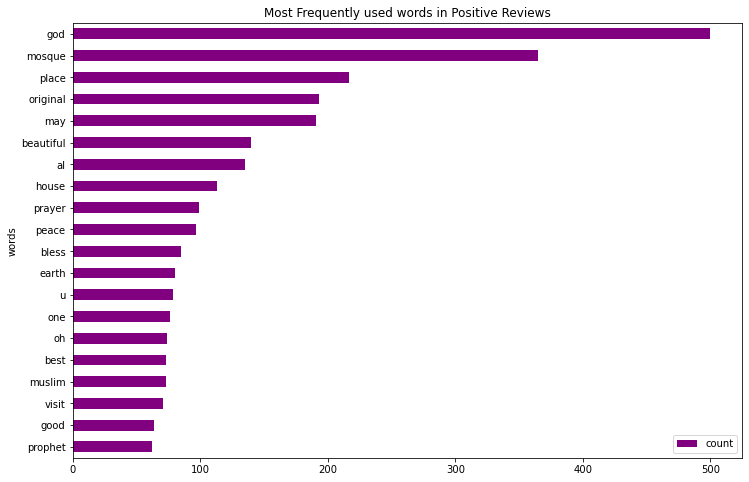

In [223]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Positive')
                                   & ((df_nlp['Offering_tag_1']=='Religious') | 
                                      (df_nlp['Offering_tag_2']=='Religious') | 
                                      (df_nlp['Offering_tag_3']=='Religious') | 
                                      (df_nlp['Offering_tag_4']=='Religious') | 
                                      (df_nlp['Offering_tag_5']=='Religious'))]['review_lemmas'])


token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Positive Reviews") 
plt.show()

#### Bi-gram

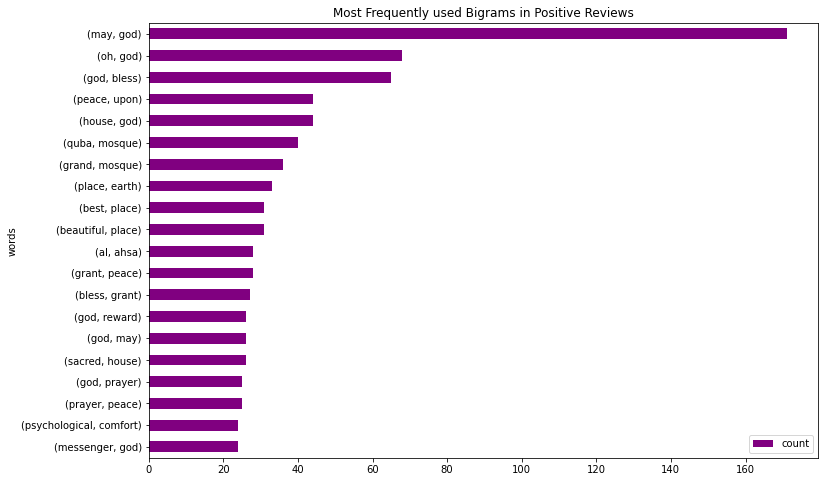

In [224]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Positive Reviews") 
plt.show()

### Religious Negative Sentiment Words

#### Uni-gram

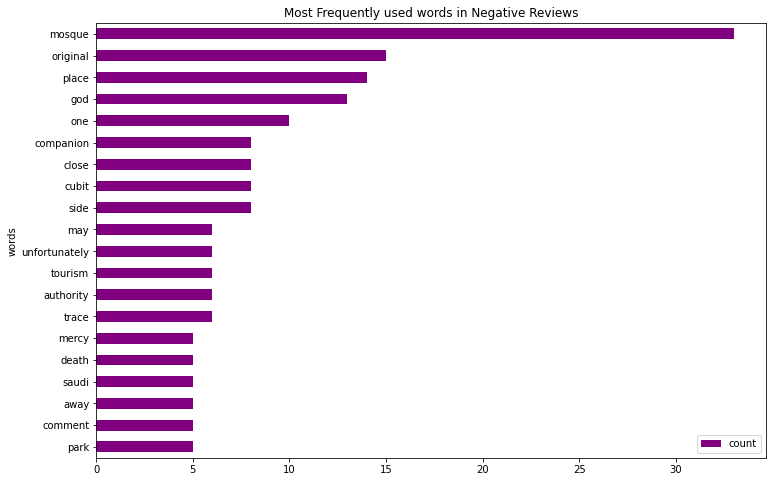

In [225]:
lemmatized_tokens = list(df_nlp.loc[(df_nlp['vader_sentiment']=='Negative')
                                   & ((df_nlp['Offering_tag_1']=='Religious') | 
                                      (df_nlp['Offering_tag_2']=='Religious') | 
                                      (df_nlp['Offering_tag_3']=='Religious') | 
                                      (df_nlp['Offering_tag_4']=='Religious') | 
                                      (df_nlp['Offering_tag_5']=='Religious'))]['review_lemmas'])

token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Negative Reviews") 
plt.show()

#### Bi-gram

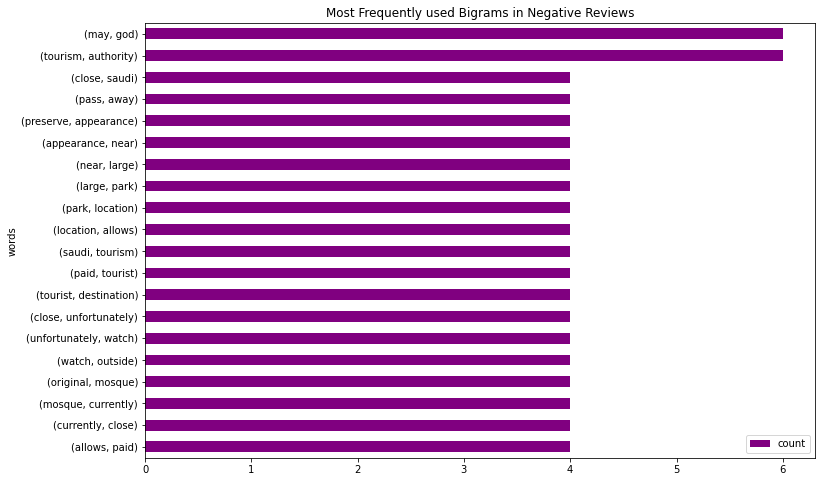

In [226]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(20), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Negative Reviews") 
plt.show()